In [1]:
#libraries we used
import numpy as np
from pydoc import help  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from pydoc import help  
import math 
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
# figures inline in notebook
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#function that prints a comparison chart between actual and predicted data
# to understand the efficiency of each method
# apply the function after the execution of a method

def plot_pred(y_pred,y_test):
    plt.figure(figsize=(16, 8))
    plt.plot(y_test, color = 'red', label = 'Real data')
    plt.plot(y_pred, color = 'blue', label = 'Predicted data')
    plt.title('Prediction')
    plt.legend()
    plt.show()
    

In [4]:
#read data from excel

datas = pd.read_excel("total_dataset.xlsx")
datas

,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),Useful Thermal Output (MMBtu),Total Fuel Consumption (MMBtu),Fuel Consumption for Electric Generation (MMBtu),\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Sulfur Content of Fuel Used in EIA Model (%),EIA Model Estimates of SO2 Emissions (Tons),EIA Model Estimates of Plant Level SO2 Emissions (Tons),CEMS Reported Plant Level SO2 Emissions (Tons),Selected SO2 Emissions (Tons)
0,1,Sand Point,AK,ELECTRIC POWER,2,IC,DFO,PET,2758000,0,28934,28934,0,4967,Barrels,0.0027,3.942805,3.942805,,3.942805
1,3,Barry,AL,ELECTRIC POWER,1,CA,NG,GAS,2824887000,0,1499638,1499638,0,1475594,Mcf,,0.442678,4306.063234,3494.67,0.359264
2,3,Barry,AL,ELECTRIC POWER,1,CT,NG,GAS,5306391000,0,55606180,55606180,0,54733332,Mcf,,16.420000,4306.063234,3494.67,13.325980
3,3,Barry,AL,ELECTRIC POWER,1,ST,BIT,COAL,4174904192,0,41521966,41521966,0,2045976,Tons,0.006583,4288.918716,4306.063234,3494.67,3480.758022
4,3,Barry,AL,ELECTRIC POWER,1,ST,NG,GAS,164624808,0,1662458,1662458,0,1615087,Mcf,,0.281841,4306.063234,3494.67,0.228733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12330,62459,Micro Santa Clara,CA,ELECTRIC POWER,2,FC,NG,GAS,5368000,0,3298,3298,0,3220,Mcf,,0.000000,0.000000,,0.000000
12331,62574,ATT Van Nyus,CA,ELECTRIC POWER,2,FC,NG,GAS,8256000,0,55406,55406,0,54266,Mcf,,0.000000,0.000000,,0.000000
12332,62625,West Water Street,MA,ELECTRIC POWER,1,IC,DFO,PET,793000,0,7551,7551,0,1302,Barrels,0.0027,1.033528,1.033528,,1.033528
12333,62658,Cuyahoga Falls 1,OH,ELECTRIC POWER,1,IC,DFO,PET,300000,0,2855,2855,0,489,Barrels,0.0027,0.388168,0.388168,,0.388168


In [5]:

df=datas.iloc[:,:].values

In [6]:
# we use the label encoder method to convert categorical values to numerical so that we can apply
# the various methods in our data
# what is done is to replace the categorical value with a numeric value between 0 and the number of categories minus 1.

fuel=LabelEncoder()

In [7]:
#choose appropriate columns for converting them into numerical values
df[:,1] = fuel.fit_transform(df[:,1])
df[:,2] = fuel.fit_transform(df[:,2])
df[:,3] = fuel.fit_transform(df[:,3])
df[:,5] = fuel.fit_transform(df[:,5])
df[:,6] = fuel.fit_transform(df[:,6])
df[:,7] = fuel.fit_transform(df[:,7])
df[:,14] = fuel.fit_transform(df[:,14])

In [8]:
df

array([[1, 2901, 0, ..., 3.9428046, ' ', 3.9428046],
       [3, 255, 1, ..., 4306.063234455, 3494.672, 0.3592643736],
       [3, 255, 1, ..., 4306.063234455, 3494.672, 13.3259800699],
       ...,
       [62625, 3564, 19, ..., 1.0335276, ' ', 1.0335276],
       [62658, 809, 35, ..., 0.3881682, ' ', 0.3881682],
       [62762, 2215, 43, ..., 0.1957383, ' ', 0.1957383]], dtype=object)

In [9]:
#convert dataset to pandas dataframe
dataset = pd.DataFrame(df, columns=['Plant Code','Plant Name','State','Sector Group','Sector Code','Prime Mover','Fuel Code','Aggregated Fuel Group','Generation (kWh)','Useful Thermal Output (MMBtu)','Total Fuel Consumption (MMBtu)','Fuel Consumption for Electric Generation (MMBtu)', 'Fuel Consumption for Useful Thermal Output (MMBtu)','Quantity of Fuel Consumed','Fuel Units','Sulfur Content of Fuel Used in EIA Model (%)','EIA Model Estimates of SO2 Emissions (Tons)','EIA Model Estimates of Plant Level SO2 Emissions (Tons)','CEMS Reported Plant Level SO2 Emissions (Tons)','Selected SO2 Emissions (Tons)'])

In [10]:
dataset

,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),Useful Thermal Output (MMBtu),Total Fuel Consumption (MMBtu),Fuel Consumption for Electric Generation (MMBtu),Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Sulfur Content of Fuel Used in EIA Model (%),EIA Model Estimates of SO2 Emissions (Tons),EIA Model Estimates of Plant Level SO2 Emissions (Tons),CEMS Reported Plant Level SO2 Emissions (Tons),Selected SO2 Emissions (Tons)
0,1,2901,0,1,2,6,4,3,2758000,0,28934,28934,0,4967,0,0.0027,3.9428,3.9428,,3.9428
1,3,255,1,1,1,0,10,1,2824887000,0,1499638,1499638,0,1475594,1,,0.442678,4306.06,3494.67,0.359264
2,3,255,1,1,1,3,10,1,5306391000,0,55606180,55606180,0,54733332,1,,16.42,4306.06,3494.67,13.326
3,3,255,1,1,1,8,2,0,4174904192,0,41521966,41521966,0,2045976,2,0.006583,4288.92,4306.06,3494.67,3480.76
4,3,255,1,1,1,8,10,1,164624808,0,1662458,1662458,0,1615087,1,,0.281841,4306.06,3494.67,0.228733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12330,62459,2079,4,1,2,4,10,1,5368000,0,3298,3298,0,3220,1,,0,0,,0
12331,62574,39,4,1,2,4,10,1,8256000,0,55406,55406,0,54266,1,,0,0,,0
12332,62625,3564,19,1,1,6,4,3,793000,0,7551,7551,0,1302,0,0.0027,1.03353,1.03353,,1.03353
12333,62658,809,35,1,1,6,4,3,300000,0,2855,2855,0,489,0,0.0027,0.388168,0.388168,,0.388168


In [11]:
#delete 2 columns which contained much null values, so their replacement with the mean value will not help.
dataset.drop('CEMS Reported Plant Level SO2 Emissions (Tons)',inplace=True,axis=1)
dataset.drop('Sulfur Content of Fuel Used in EIA Model (%)',inplace=True,axis=1)
#separation of data into indepentent and the dependent column which is our target.
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,[16]].values


In [12]:
dataset = dataset.fillna(dataset.mean())

(12335, 2)


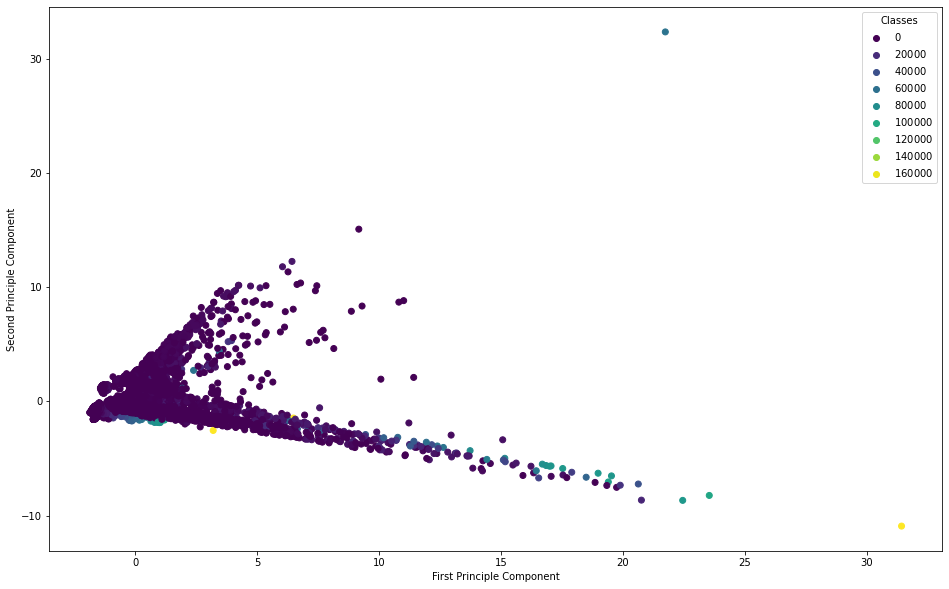

In [13]:
#use of pca to plot the data before processing them
x_scaled = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)

print(x_pca.shape)

fig, ax = plt.subplots(figsize=(16, 10))

scatter = ax.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")

In [14]:
#below we print diagrams of one row in relationship with the dependent column in order to see with a new diagram if our preprocessing worked.

<AxesSubplot:xlabel='Quantity of Fuel Consumed', ylabel='Selected SO2 Emissions (Tons)'>

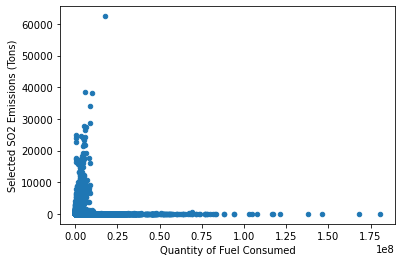

In [15]:
dataset.plot(kind='scatter',x='Quantity of Fuel Consumed',y='Selected SO2 Emissions (Tons)')

<AxesSubplot:xlabel='Aggregated Fuel Group', ylabel='Selected SO2 Emissions (Tons)'>

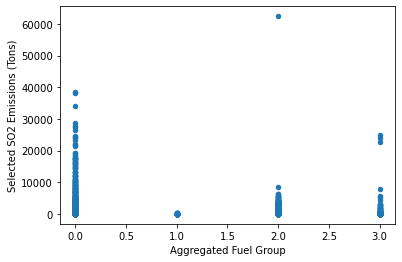

In [16]:
dataset.plot(kind='scatter',x='Aggregated Fuel Group',y='Selected SO2 Emissions (Tons)')

<AxesSubplot:xlabel='Generation (kWh)', ylabel='Selected SO2 Emissions (Tons)'>

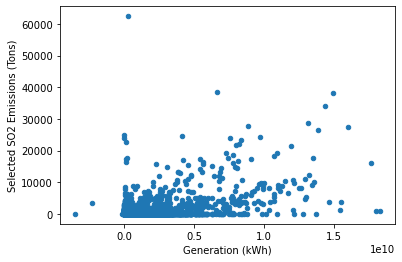

In [17]:
dataset.plot(kind='scatter',x='Generation (kWh)',y='Selected SO2 Emissions (Tons)')

In [18]:
x=dataset.iloc[:,:-1]
corr_features = set()
corr_matrix = x.corr()

for i in range(len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j])>0.7:
        colname = corr_matrix.columns[i]
        corr_features.add(colname)
corr_features  

{'Fuel Consumption for Electric Generation (MMBtu)',
 'Fuel Consumption for Useful Thermal Output (MMBtu)',
 'Fuel Units',
 'Total Fuel Consumption (MMBtu)'}

In [19]:
#use of correlation matrix
#delete columns which do not contribute to the prediction f our final result. 
dataset.drop('Plant Code',inplace=True,axis=1)
dataset.drop('Plant Name',inplace=True,axis=1)
dataset.drop('Fuel Units',inplace=True,axis=1)
dataset.drop('Fuel Consumption for Useful Thermal Output (MMBtu)',inplace=True,axis=1)
dataset.drop('EIA Model Estimates of SO2 Emissions (Tons)',inplace=True,axis=1)
dataset.drop('EIA Model Estimates of Plant Level SO2 Emissions (Tons)',inplace=True,axis=1)
dataset.drop('Total Fuel Consumption (MMBtu)',inplace=True,axis=1)

In [20]:
# function that applies the IQR method to eliminate outliers.
# where Q1 is the lower bound which represents 25% of the values and Q3 the upper ie 75% of the values.
# To construct this limit we take 1.5 times the IQR (Q3 − Q1) and then subtract this value from Q1 and add this value to Q3.
# Any observations greater than 1.5 ∗ IQR below Q1 or greater than 1.5 ∗ IQR above Q3 are considered extreme values.
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound =Q3 +1.5*IQR
    
    ls = df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
    
    return ls

In [21]:
#create a list which contains all rows of every column which has outlier.
index_list = []
for feature in (['State','Sector Group','Sector Code','Prime Mover','Fuel Code','Aggregated Fuel Group','Generation (kWh)','Useful Thermal Output (MMBtu)','Fuel Consumption for Electric Generation (MMBtu)','Quantity of Fuel Consumed','Selected SO2 Emissions (Tons)']):
    index_list.extend(outliers(dataset,feature))
    

In [22]:
len(index_list)

18701

In [23]:
index_list

[667,
 668,
 669,
 670,
 843,
 844,
 845,
 2079,
 2164,
 2470,
 2475,
 2476,
 2477,
 2478,
 2479,
 2480,
 2481,
 2482,
 2483,
 2484,
 2485,
 2486,
 2487,
 2488,
 2493,
 2494,
 2497,
 2500,
 2501,
 2504,
 2505,
 2508,
 2509,
 2510,
 2511,
 2512,
 2513,
 2514,
 2515,
 2519,
 2520,
 2523,
 2526,
 2527,
 2528,
 2529,
 2530,
 2531,
 2532,
 2533,
 2534,
 2537,
 2538,
 2539,
 2542,
 2546,
 2547,
 2548,
 2551,
 2552,
 2557,
 2558,
 2559,
 2564,
 2565,
 2566,
 2567,
 2568,
 2569,
 2570,
 2571,
 2572,
 2573,
 2574,
 2575,
 2576,
 2577,
 2578,
 2579,
 2580,
 2581,
 2582,
 2583,
 2584,
 2585,
 2586,
 2587,
 2588,
 2589,
 2590,
 2591,
 2592,
 2593,
 2594,
 2595,
 2596,
 2597,
 2598,
 2599,
 2600,
 2601,
 2602,
 2603,
 2604,
 2605,
 2608,
 2609,
 2610,
 2611,
 2612,
 2613,
 2614,
 2615,
 2616,
 2617,
 2618,
 2623,
 2624,
 2627,
 2628,
 2629,
 2630,
 2637,
 2638,
 2639,
 2640,
 2641,
 2642,
 2643,
 2658,
 2659,
 2660,
 2661,
 2662,
 2663,
 2664,
 2665,
 2666,
 2678,
 2679,
 2680,
 2681,
 2684,
 2685,

In [24]:
#delete all rows that considered outliers.
dataset.drop(index_list,axis=0,inplace=True)

In [25]:
print(dataset.shape)
dataset

(5283, 11)


,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),Useful Thermal Output (MMBtu),Fuel Consumption for Electric Generation (MMBtu),Quantity of Fuel Consumed,Selected SO2 Emissions (Tons)
0,0,1,2,6,4,3,2758000,0,28934,4967,3.942805
4,1,1,1,8,10,1,164624808,0,1662458,1615087,0.228733
7,1,1,1,8,4,3,1218110,0,12615,2174,0.050733
8,43,1,1,5,10,1,39534000,0,688550,665265,0.199579
9,1,1,1,5,10,1,43505886,0,605246,586867,0.224366
...,...,...,...,...,...,...,...,...,...,...,...
12329,4,1,2,4,10,1,236000,0,4587,4462,0.000000
12330,4,1,2,4,10,1,5368000,0,3298,3220,0.000000
12331,4,1,2,4,10,1,8256000,0,55406,54266,0.000000
12332,19,1,1,6,4,3,793000,0,7551,1302,1.033528


In [26]:
# print a diagram of selected data in relation to the dependent variable
# we observe that the problem with the outliers is largely solved.

<AxesSubplot:xlabel='Quantity of Fuel Consumed', ylabel='Selected SO2 Emissions (Tons)'>

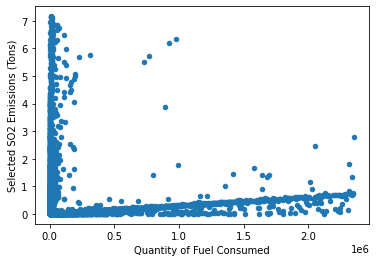

In [27]:
dataset.plot(kind='scatter',x='Quantity of Fuel Consumed',y='Selected SO2 Emissions (Tons)')

<AxesSubplot:xlabel='Generation (kWh)', ylabel='Selected SO2 Emissions (Tons)'>

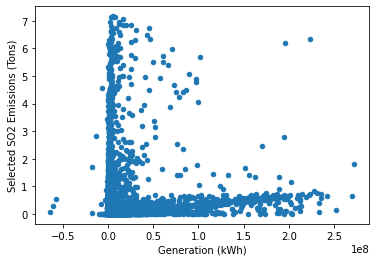

In [28]:
dataset.plot(kind='scatter',x='Generation (kWh)',y='Selected SO2 Emissions (Tons)')

<AxesSubplot:xlabel='Aggregated Fuel Group', ylabel='Selected SO2 Emissions (Tons)'>

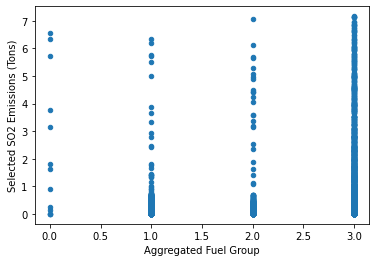

In [29]:
dataset.plot(kind='scatter',x='Aggregated Fuel Group',y='Selected SO2 Emissions (Tons)')

In [30]:
x=dataset.iloc[:,:-1]
corr_features = set()
corr_matrix = x.corr()

for i in range(len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j])>0.7:
        colname = corr_matrix.columns[i]
        corr_features.add(colname)
corr_features  

{'Aggregated Fuel Group',
 'Fuel Consumption for Electric Generation (MMBtu)',
 'Quantity of Fuel Consumed'}

In [31]:
# assignment of final independent variables and dependent y
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,[10]].values


In [32]:
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[-1.63621524,  0.        ,  1.20352541, ..., -0.06957673,
        -0.43486583, -0.49944803],
       [-1.56507662,  0.        , -0.72029448, ..., -0.06957673,
         3.47094344,  3.14428204],
       [-1.56507662,  0.        , -0.72029448, ..., -0.06957673,
        -0.47388509, -0.50576864],
       ...,
       [-1.35166075,  0.        ,  1.20352541, ..., -0.06957673,
        -0.37157041, -0.38788352],
       [-0.28458142,  0.        , -0.72029448, ..., -0.06957673,
        -0.48599328, -0.50774199],
       [ 0.85363653,  0.        , -0.72029448, ..., -0.06957673,
        -0.49722157, -0.50958182]])

In [33]:
# final pca application for printing a diagram after applying methods for processing our data
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [34]:


pca.fit(x_scaled)

PCA(n_components=2)

In [35]:
x_pca=pca.transform(x_scaled)
print(x_pca.shape)
x_pca

(5283, 2)


array([[-1.26254706,  0.05997168],
       [ 5.73597186,  1.86033147],
       [-1.6763996 ,  0.54992965],
       ...,
       [ 0.60613233, -2.23691603],
       [-1.54331885,  0.74056783],
       [-1.55971334,  1.03885042]])

(5283, 2)


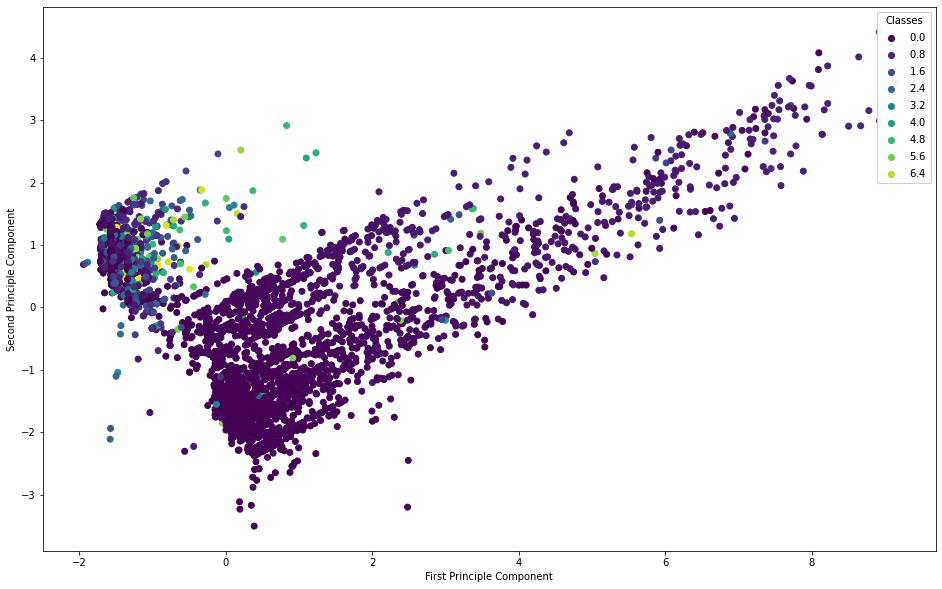

In [36]:
x_scaled = StandardScaler().fit_transform(x)
y_scaled = StandardScaler().fit_transform(y)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)
print(x_pca.shape)

fig, ax = plt.subplots(figsize=(16, 10))

scatter = ax.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)
# we observe from the diagram below that the processing of our data helped to remove the outliers except in certain cases.

Εφαρμογή των διαφόρων προβλεπτικών μοντέλων 

In [37]:
#we begin with random forest regression
from sklearn.model_selection import train_test_split
x_trn,x_ts,y_trn,y_ts = train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
#application of an iterative way to find the optimal estimator for the optimal performance of the method in our data.
# The selection was made based on the smallest mean squared error.
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
for K in range(150):
    K = K+1
    re= RandomForestRegressor(n_estimators = K , random_state=0)

    re.fit(x_trn,y_trn)  #fit the model
    pred=re.predict(x_ts) #make prediction on test set
    error = math.sqrt(mean_squared_error(y_ts,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.9133000117286665
RMSE value for k=  2 is: 0.8130725410010539
RMSE value for k=  3 is: 0.7677047859319224
RMSE value for k=  4 is: 0.7600551898235121
RMSE value for k=  5 is: 0.7188760273724635
RMSE value for k=  6 is: 0.7158721965500215
RMSE value for k=  7 is: 0.7010044944737482
RMSE value for k=  8 is: 0.696011735192765
RMSE value for k=  9 is: 0.6874910381423159
RMSE value for k=  10 is: 0.6917903884368342
RMSE value for k=  11 is: 0.6817251663870478
RMSE value for k=  12 is: 0.6826182823892757
RMSE value for k=  13 is: 0.6834992346166512
RMSE value for k=  14 is: 0.682891245208825
RMSE value for k=  15 is: 0.6792988807190614
RMSE value for k=  16 is: 0.681851616890041
RMSE value for k=  17 is: 0.6858019322839084
RMSE value for k=  18 is: 0.6806293338135065
RMSE value for k=  19 is: 0.6756105541020313
RMSE value for k=  20 is: 0.6785886346754229
RMSE value for k=  21 is: 0.6786680113011996
RMSE value for k=  22 is: 0.6754217552956912
RMSE value for k=  23 

<AxesSubplot:>

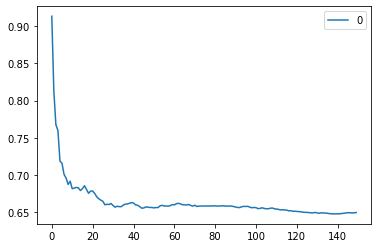

In [40]:
##diagram of every mean squared error for each estimator
curve = pd.DataFrame(rmse_val) 
curve.plot()

In [41]:
# we found that the value of the estimator that gives the smallest mean squared error is 24
re= RandomForestRegressor(n_estimators = 44 , random_state=0)

In [42]:
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

cross_val_score(re,x,y,cv=10).mean()

0.6380121284930326

In [43]:
re.fit(x_trn,y_trn)

RandomForestRegressor(n_estimators=44, random_state=0)

In [44]:
y_pr = re.predict((x_ts))

In [45]:
# we chose r squared as a measure to evaluate the performance of each method
# R ^ 2 is a statistical measure of the percentage of variance for a dependent 
#variable explained by an independent variable or variables in regression.
from sklearn import metrics
score1 = metrics.r2_score(y_ts,y_pr)
score1

0.6717996343468667

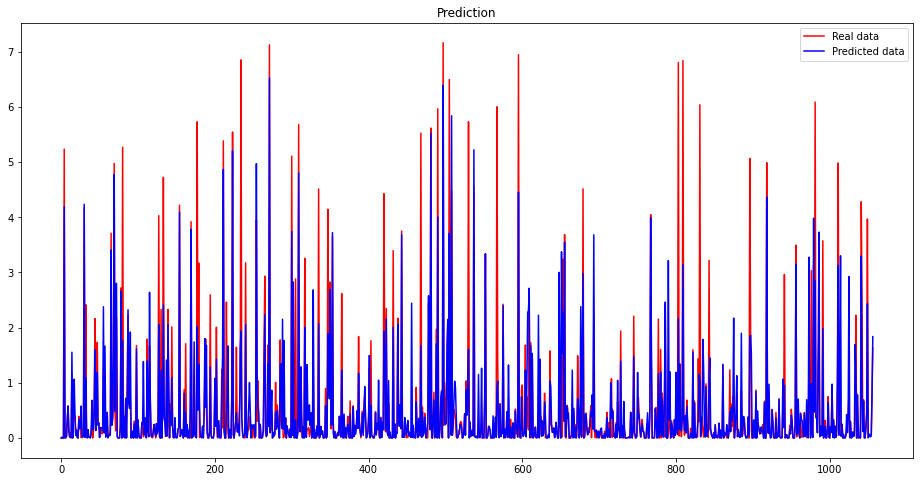

In [46]:
# Diagram for compare the real value in relation to the predicted value of the method we applied.
plot_pred(y_pr,y_ts)

0.2482956215262313


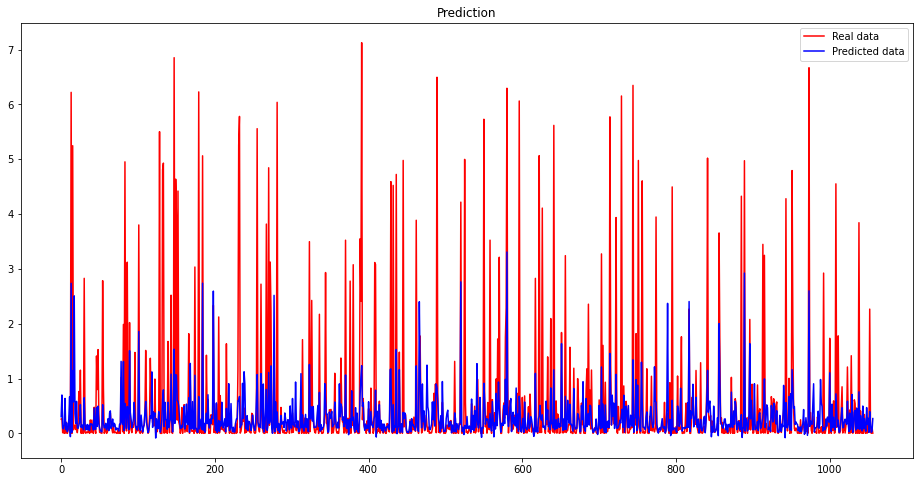

In [47]:
#separation of dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
scaled=StandardScaler()
x_train = scaled.fit_transform(x_train)
x_test = scaled.fit_transform(x_test)
from sklearn.svm import SVR
#εφαρμογή svr 
reg=SVR(kernel='rbf')
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
#εκτύπωση ακρίβειας πρόβλεψης
from sklearn.metrics import r2_score
score7 = r2_score(y_test,y_pred)
print(score7)
#we do not achieve satisfying score.
# Diagram for compare the real value in relation to the predicted value of the method we applied.
plot_pred(y_pred,y_test)

In [48]:
#KNN regresion
from sklearn.neighbors import NearestNeighbors,KNeighborsRegressor

In [49]:
from sklearn.model_selection import train_test_split
x_trn,x_ts,y_trn,y_ts = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
scaled=StandardScaler()
x_trn = scaled.fit_transform(x_trn)
x_ts = scaled.fit_transform(x_ts)

In [51]:
#find optimal k based on mean squared error.
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
for K in range(400):
    K = K+1
    knn = KNeighborsRegressor(K)

    knn.fit(x_trn,y_trn)  #fit the model
    pred=knn.predict(x_ts) #make prediction on test set
    error = math.sqrt(mean_squared_error(y_ts,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.8577085368519939
RMSE value for k=  2 is: 0.7742861283817332
RMSE value for k=  3 is: 0.7557396582445749
RMSE value for k=  4 is: 0.7664817115750485
RMSE value for k=  5 is: 0.7569634903801585
RMSE value for k=  6 is: 0.7489633706050436
RMSE value for k=  7 is: 0.7617413335287844
RMSE value for k=  8 is: 0.768383719451883
RMSE value for k=  9 is: 0.7778292260868045
RMSE value for k=  10 is: 0.7897759349068249
RMSE value for k=  11 is: 0.7921828333158124
RMSE value for k=  12 is: 0.8050421235933762
RMSE value for k=  13 is: 0.8127462344575117
RMSE value for k=  14 is: 0.8149855840565778
RMSE value for k=  15 is: 0.8229580361842153
RMSE value for k=  16 is: 0.8319615646074442
RMSE value for k=  17 is: 0.838833911746532
RMSE value for k=  18 is: 0.84762220750604
RMSE value for k=  19 is: 0.8509332852635587
RMSE value for k=  20 is: 0.8527301928814469
RMSE value for k=  21 is: 0.8538730711935386
RMSE value for k=  22 is: 0.8597612755079221
RMSE value for k=  23 i

RMSE value for k=  182 is: 0.9889998450064444
RMSE value for k=  183 is: 0.9891970691737537
RMSE value for k=  184 is: 0.9898090042791943
RMSE value for k=  185 is: 0.9900741413687139
RMSE value for k=  186 is: 0.9902930468410067
RMSE value for k=  187 is: 0.990571234813164
RMSE value for k=  188 is: 0.9911760515994524
RMSE value for k=  189 is: 0.9917152664836888
RMSE value for k=  190 is: 0.9919842556891484
RMSE value for k=  191 is: 0.9923662558461561
RMSE value for k=  192 is: 0.9928782457260256
RMSE value for k=  193 is: 0.9934291553215943
RMSE value for k=  194 is: 0.9934357983176619
RMSE value for k=  195 is: 0.9936793195974024
RMSE value for k=  196 is: 0.9939346810056904
RMSE value for k=  197 is: 0.9943413106498016
RMSE value for k=  198 is: 0.9945068982112394
RMSE value for k=  199 is: 0.9951441865899687
RMSE value for k=  200 is: 0.9954687680190724
RMSE value for k=  201 is: 0.9961160861906875
RMSE value for k=  202 is: 0.9966260709307319
RMSE value for k=  203 is: 0.997196

RMSE value for k=  362 is: 1.0379423728400754
RMSE value for k=  363 is: 1.0381386979576026
RMSE value for k=  364 is: 1.038166526677235
RMSE value for k=  365 is: 1.0384286917119276
RMSE value for k=  366 is: 1.0386089997011305
RMSE value for k=  367 is: 1.0387992881384838
RMSE value for k=  368 is: 1.0388246660379081
RMSE value for k=  369 is: 1.039020172537304
RMSE value for k=  370 is: 1.039272246321993
RMSE value for k=  371 is: 1.0395509065859974
RMSE value for k=  372 is: 1.0397764643341525
RMSE value for k=  373 is: 1.039921686793311
RMSE value for k=  374 is: 1.0401655842786628
RMSE value for k=  375 is: 1.0401376973209109
RMSE value for k=  376 is: 1.0399326814140069
RMSE value for k=  377 is: 1.040145167212645
RMSE value for k=  378 is: 1.0401416180432916
RMSE value for k=  379 is: 1.040288238485715
RMSE value for k=  380 is: 1.0403547602323049
RMSE value for k=  381 is: 1.0406501339415921
RMSE value for k=  382 is: 1.0408928096953283
RMSE value for k=  383 is: 1.04112306255

<AxesSubplot:>

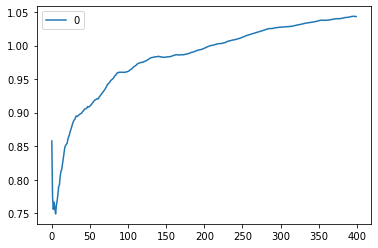

In [52]:
#diagram of every mean squared error for each estimator
#optimal k: k =8
curve = pd.DataFrame(rmse_val) 
curve.plot()

In [53]:
knn = KNeighborsRegressor(8)

knn.fit(x_trn,y_trn)  #fit the model

KNeighborsRegressor(n_neighbors=8)

In [54]:
y_predict = knn.predict(x_ts)

In [55]:
#calculation of prediction score
from sklearn import metrics
score2 = metrics.r2_score(y_ts,y_predict)
score2

0.552216365141101

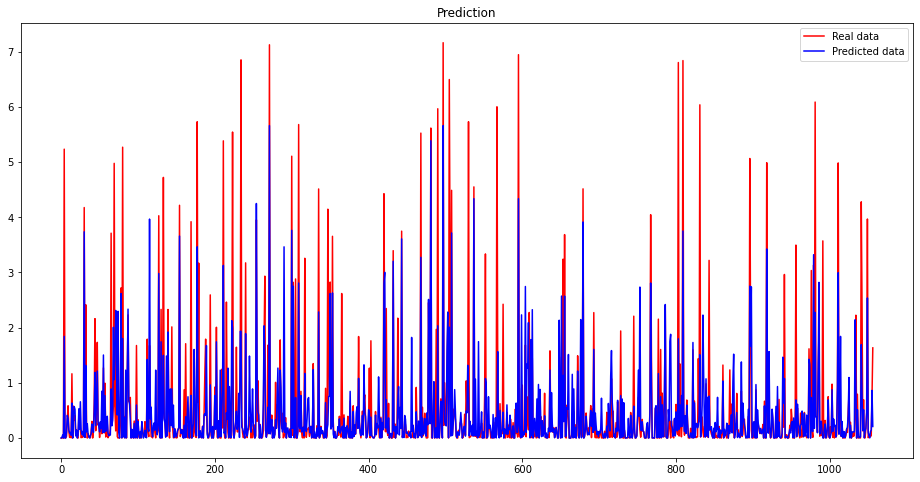

In [56]:
# Diagram for compare the real value in relation to the predicted value of the method we applied.
plot_pred(y_predict,y_ts)


In [57]:
from sklearn.model_selection import train_test_split
x_tr,x_t,y_tr,y_t = train_test_split(x,y,test_size=0.21,random_state=0)

In [58]:
# regression application with decision trees.
# Through regression with decision trees the data set is analyzed in smaller subsets. ́
# A decision tree is divided into two or more categories that represent the value of the attribute under consideration.
# The top node in the decision tree is the best predictor called root.
# Uses a top-down approach and the separations are based on the standard deviation.
# The final value will be the average of the leaf nodes.
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor(random_state=0)
dtree_reg.fit(x_tr,y_tr)

DecisionTreeRegressor(random_state=0)

In [59]:
y_pr_dtree = dtree_reg.predict((x_t))

In [60]:
#calculation of prediction score.
from sklearn import metrics
score3 = metrics.r2_score(y_t,y_pr_dtree)
score3

0.4136560256326055

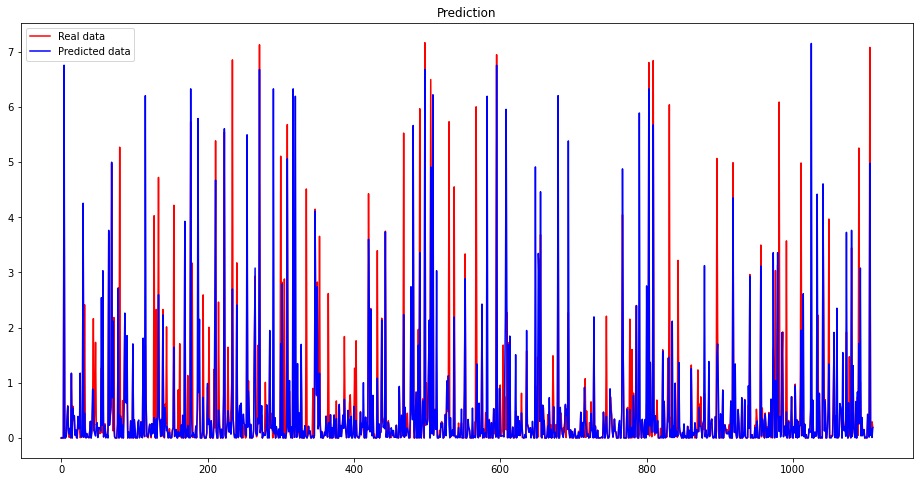

In [61]:
# Diagram for compare the real value in relation to the predicted value of the method we applied.
plot_pred(y_pr_dtree,y_t)


In [62]:
x=np.asarray(x).astype(np.float64) 
y=np.asarray(y).astype(np.float64)
y

array([[3.9428046 ],
       [0.22873344],
       [0.05073264],
       ...,
       [0.        ],
       [1.0335276 ],
       [0.3881682 ]])

In [63]:
# Below we tried to train neural network for prediction
from tensorflow.keras.models import Sequential

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
# as activation function we used different functions without any particular difference
# number of layers = 3, number of first and second layer neurons = 25
model = Sequential()

model.add(Dense(52, activation = 'relu', input_dim = 10))
model.add(Dense(52, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
#model.add(Dense(units = 1))

In [67]:
# Adam is a replacement optimization algorithm for stochastic gradient descent.
# Adam combines the best features of AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients in noisy problems.
model.compile(optimizer = 'adam',loss = 'mean_squared_error', metrics=['accuracy'])

In [68]:
model.fit(X_train, y_train, batch_size = 24, epochs = 100)

Epoch 1/100
166/166 [==============================] - 1s 1ms/step - loss: 1.2185 - accuracy: 0.0320
Epoch 2/100
166/166 [==============================] - 0s 1ms/step - loss: 1.0617 - accuracy: 0.0283
Epoch 3/100
166/166 [==============================] - 0s 1ms/step - loss: 0.8203 - accuracy: 0.0265
Epoch 4/100
166/166 [==============================] - 0s 1ms/step - loss: 0.8057 - accuracy: 0.0297
Epoch 5/100
166/166 [==============================] - 0s 1ms/step - loss: 0.7403 - accuracy: 0.0325
Epoch 6/100
166/166 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.0318
Epoch 7/100
166/166 [==============================] - 0s 1ms/step - loss: 0.7373 - accuracy: 0.0363
Epoch 8/100
166/166 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.0248
Epoch 9/100
166/166 [==============================] - 0s 2ms/step - loss: 0.7198 - accuracy: 0.0347: 0s - loss: 0.7722 - accuracy
Epoch 10/100
166/166 [==============================] - 0s 1m

166/166 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.0361
Epoch 82/100
166/166 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.0299
Epoch 83/100
166/166 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.0333
Epoch 84/100
166/166 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.0309
Epoch 85/100
166/166 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.0333
Epoch 86/100
166/166 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.0303
Epoch 87/100
166/166 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.0311
Epoch 88/100
166/166 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.0333
Epoch 89/100
166/166 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.0270
Epoch 90/100
166/166 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 

In [69]:
y_pred = model.predict(X_test)

In [70]:
#print prediction score
#scores = model.evaluate(x_test, y_test)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
score4, acc = model.evaluate(X_test, y_test,batch_size=13)
print('Test score:', score4)
print('Test accuracy:', acc)

102/102 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.0394
Test score: 0.5292572379112244
Test accuracy: 0.03936411812901497


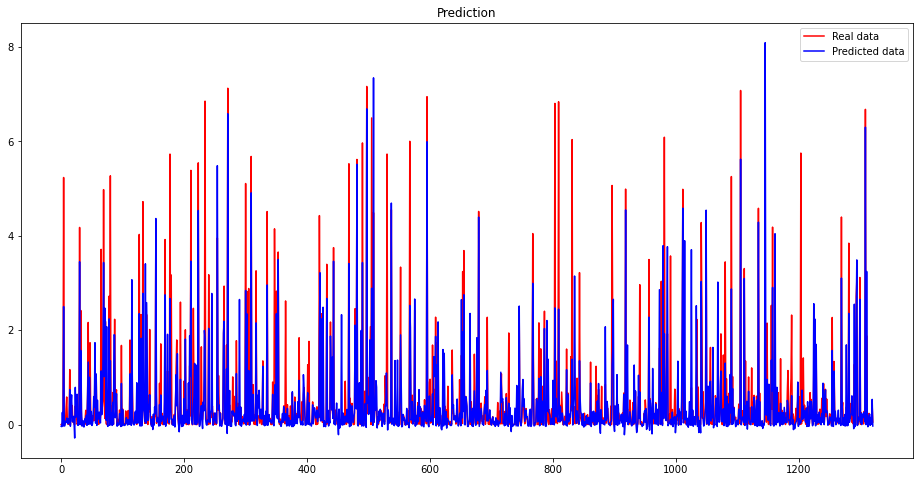

In [71]:
# Diagram for compare the real value in relation to the predicted value of the method we applied.
#not satisfying prediction
plot_pred(y_pred,y_test)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [73]:
scaled=StandardScaler()
x_train = scaled.fit_transform(x_train)
y_train = scaled.fit_transform(y_train)

In [74]:
x_test = scaled.fit_transform(x_test)
y_test = scaled.fit_transform(y_test)


In [75]:
# Linear regression application
# which attempts to model the relationship between two variables by adapting a linear equation to observed data.
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [76]:
#cross_val_score(reg,x,y,cv=8).mean()

In [77]:
y_pred = reg.predict(x_test)

In [78]:
#print prediction score
from sklearn.metrics import r2_score
score5 = r2_score(y_test,y_pred)
score5

0.18590187035116956

In [79]:
#coefficients of linear regression
reg.coef_

array([[-5.14778571e-02, -2.77555756e-16,  8.20003889e-02,
        -1.46982587e-02, -1.97981798e-01,  1.86220539e-01,
         5.28927482e-02,  2.20302613e-02,  7.03323359e-01,
        -6.31607726e-01]])

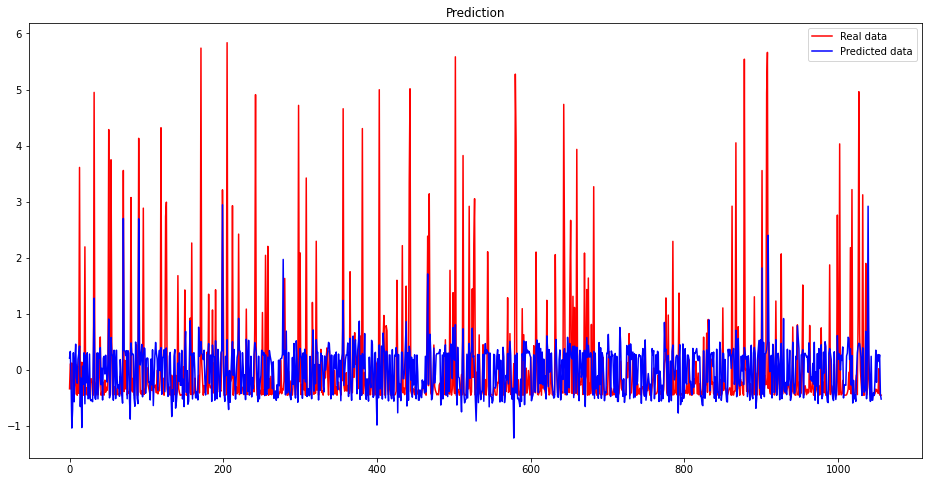

In [80]:
# Diagram for compare the real value in relation to the predicted value of the method we applied.
# we expected the weakness of the method.
plot_pred(y_pred,y_test)

In [81]:
from sklearn.model_selection import train_test_split
x_trn,x_ts,y_trn,y_ts = train_test_split(x,y,test_size=0.3,random_state=0)

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
#gradient boosting regression.
re= GradientBoostingRegressor()

In [84]:
re.fit(x_trn,y_trn)

GradientBoostingRegressor()

In [85]:
y_pr = re.predict((x_ts))

In [86]:
#print accuracy
from sklearn import metrics
score8 = metrics.r2_score(y_ts,y_pr)
score8
# The second best score we came across after random forest regression.

0.6228336063921746

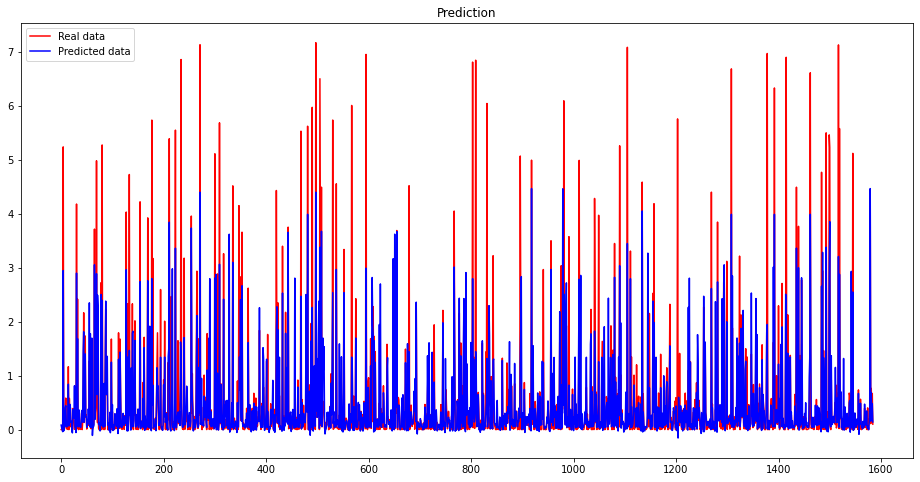

In [87]:
# Diagram for compare the real value in relation to the predicted value of the method we applied.
plot_pred(y_pr,y_ts)

In [88]:
# list of all the scores we observed in the methods we applied
scores = [score1,score2,score3,acc,score5,score7,score8]

In [89]:
scores

[0.6717996343468667,
 0.552216365141101,
 0.4136560256326055,
 0.03936411812901497,
 0.18590187035116956,
 0.2482956215262313,
 0.6228336063921746]

No handles with labels found to put in legend.


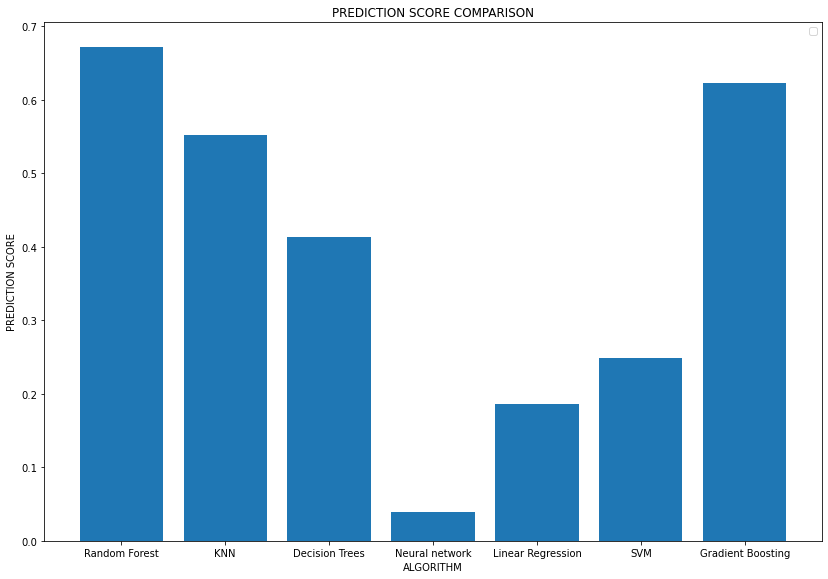

In [90]:
# Comparative diagram between the scores of each method depending on the regression method applied.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1.8,1.8])
algorithms = ['Random Forest', 'KNN', 'Decision Trees', 'Neural network', 'Linear Regression','SVM','Gradient Boosting']
total_scores= scores
ax.bar(algorithms,total_scores)
plt.title('PREDICTION SCORE COMPARISON')
plt.legend()
plt.xlabel("ALGORITHM")
plt.ylabel("PREDICTION SCORE")
plt.show()

In [91]:
#end